In [28]:
import numpy as np
import pandas as pd 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [29]:
from keras.models import Sequential,load_model,Model 
from keras.layers import Input, Dense, Dropout, Flatten, Activation, MaxPool2D
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,GlobalAveragePooling2D,SeparableConv1D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.callbacks import ReduceLROnPlateau,LearningRateScheduler,ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical 

In [30]:
def prepare_data():
    X,y=make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)
    nb_classes=len(set(y))
    y=np.eye(nb_classes)[y]
    n_train=700
    X_train,X_test= X[:n_train,:], X[n_train:,:]
    train_y,test_y=y[:n_train,:], y[n_train:,:]
    return X_train,train_y,X_test,test_y

Epoch 1/50
22/22 [==============================] - 1s 16ms/step - loss: 1.4269 - accuracy: 0.5129 - val_loss: 0.7696 - val_accuracy: 0.6067
Epoch 2/50
22/22 [==============================] - 0s 6ms/step - loss: 1.0473 - accuracy: 0.5571 - val_loss: 0.9050 - val_accuracy: 0.5700
Epoch 3/50
22/22 [==============================] - 0s 6ms/step - loss: 1.0037 - accuracy: 0.5629 - val_loss: 0.9636 - val_accuracy: 0.6133
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.9215 - accuracy: 0.6129 - val_loss: 0.6246 - val_accuracy: 0.7067
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 0.9400 - accuracy: 0.5957 - val_loss: 0.9810 - val_accuracy: 0.5067
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 0.8077 - accuracy: 0.6229 - val_loss: 0.8756 - val_accuracy: 0.6067
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.9436 - accuracy: 0.5857 - val_loss: 0.7551 - val_accuracy: 0.6667
Epoch 8/50
22/22 [=

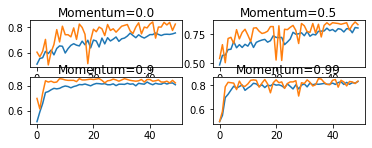

In [34]:
def fit_model(X_train,train_y,X_test,test_y, momentums):
    model=Sequential()
    model.add(Dense(50,input_shape=(2,),activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax')) 
    opt=SGD(lr=0.01, momentum=momentums)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    history=model.fit(X_train,train_y,validation_data=(X_test,test_y),epochs=50) 
    plt.plot(history.history['accuracy'],label='train')
    plt.plot(history.history['val_accuracy'],label='test') 
    plt.title("Momentum="+str(momentums),pad=-50)


X_train,train_y,X_test,test_y=prepare_data()
momentums = [0.0, 0.5, 0.9, 0.99]

for i in range(len(momentums)):
    plot_no=420+(i+1)
    plt.subplot(plot_no)
    fit_model(X_train,train_y,X_test,test_y, momentums[i])
plt.show()    

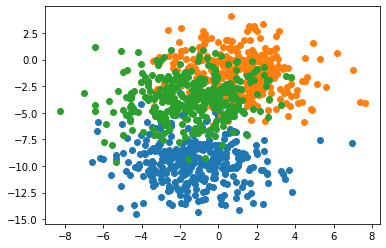

In [14]:
for class_range in range(3):
    row_ix=np.where(y==class_range)
    plt.scatter(X[row_ix,0],X[row_ix,1])
plt.show()    


Epoch 1/50
22/22 [==============================] - 1s 14ms/step - loss: 2.3007 - accuracy: 0.3614 - val_loss: 1.0936 - val_accuracy: 0.4300
Epoch 2/50
22/22 [==============================] - 0s 6ms/step - loss: 0.9371 - accuracy: 0.4900 - val_loss: 0.7199 - val_accuracy: 0.6667
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 0.7538 - accuracy: 0.6157 - val_loss: 0.6562 - val_accuracy: 0.7100
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.7109 - accuracy: 0.6500 - val_loss: 0.6596 - val_accuracy: 0.7333
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.6557 - val_loss: 0.6045 - val_accuracy: 0.7167
Epoch 6/50
22/22 [==============================] - 0s 6ms/step - loss: 0.6734 - accuracy: 0.6557 - val_loss: 0.5978 - val_accuracy: 0.7267
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6674 - accuracy: 0.6757 - val_loss: 0.5874 - val_accuracy: 0.7400
Epoch 8/50
22/22 [=

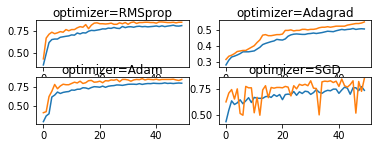

In [39]:
def fit_model(X_train,train_y,X_test,test_y,optimizer):
    model=Sequential()
    model.add(Dense(50,input_shape=(2,),activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax')) 
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    history=model.fit(X_train,train_y,validation_data=(X_test,test_y),epochs=50) 
    plt.plot(history.history['accuracy'],label='train')
    plt.plot(history.history['val_accuracy'],label='test') 
    plt.title("optimizer="+str(optimizer),pad=-50)


X_train,train_y,X_test,test_y=prepare_data()
optimizer=['RMSprop','Adagrad','Adam','SGD']

for i in range(len(momentums)):
    plot_no=420+(i+1)
    plt.subplot(plot_no)
    fit_model(X_train,train_y,X_test,test_y, optimizer[i])
plt.show() 